#CSV combine

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data = pd.read_csv('data/data-1729656846556.csv')
data2 = pd.read_csv('data/data-1731975851140.csv')
data3 = pd.read_csv('data/data-1732074777669.csv')
merged = pd.concat([data, data2, data3], ignore_index=True)
duplicate_rows = merged[merged.duplicated()]

if len(duplicate_rows) > 0:
    print("Duplicated rows:")
    print(duplicate_rows)

deduplicated = merged.drop_duplicates()

deduplicated.to_csv('data/newimage.csv', index=False)

#exclude rows with "pending" values and only keep rows labeled as "approved" or "declined"

In [ ]:
CSV_FILE_PATH = 'data/newimage.csv'
df = pd.read_csv(CSV_FILE_PATH)

print(len(df))

# Filter for rows where image_status is 'Approved' or 'Declined'
filtered_df = df[df['image_status'].isin(['Approved', 'Declined'])]

print(len(df) - len(filtered_df))
# Save the filtered data to a new CSV file
output_path = 'data/newimage.csv'  # Replace with your desired save path
filtered_df.to_csv(output_path, index=False)

#ensure only rows corresponding to existing image files are retained, and rows without associated images are removed

In [ ]:
import os
import pandas as pd

CSV_FILE_PATH = 'data/newimage.csv'
IMAGE_DIR = 'data/newimage_cropped'  # 이미지 파일이 저장된 디렉토리 경로

df = pd.read_csv(CSV_FILE_PATH)


def clean_and_check_image_data(df, image_dir):
    # 데이터프레임에 있는 이미지 경로를 기준으로 실제 존재 여부를 확인
    valid_data = []
    missing_in_metadata = []

    # 1. 메타데이터 기준으로 실제 이미지 파일을 체크
    for idx, row in df.iterrows():
        image_name = row["image_name"]
        image_status = row["image_status"]  # approved 또는 declined
        status_folder = image_status.lower()  # 폴더 이름 변환 (소문자 처리)
        
        # 경로 생성
        image_path = os.path.join(image_dir, status_folder, image_name)

        # 이미지가 존재하는 경우만 valid_data 리스트에 추가
        if os.path.exists(image_path):
            valid_data.append(row)
        else:
            print(f"Image missing: {image_path}")

    # 유효한 데이터를 새로운 DataFrame으로 반환
    cleaned_df = pd.DataFrame(valid_data)

    return cleaned_df

# def clean_and_check_image_data(df, image_dir):
#     # 데이터프레임에 있는 이미지 경로를 기준으로 실제 존재 여부를 확인
#     valid_data = []
#     missing_in_metadata = []

#     # 1. 메타데이터 기준으로 실제 이미지 파일을 체크
#     for idx, row in df.iterrows():
#         job_no = str(row["job_no"])
#         image_name = row["image_name"]
#         image_path = os.path.join(image_dir, job_no, image_name)

#         # 이미지가 존재하는 경우만 valid_data 리스트에 추가
#         if os.path.exists(image_path):
#             valid_data.append(row)
#         else:
#             print(f"Image missing: {image_path}")

#     cleaned_df = pd.DataFrame(valid_data)

#     return cleaned_df

df2 = clean_and_check_image_data(df, IMAGE_DIR)

print(len(df) - len(df2))

df2.to_csv('data/newimage.csv', index=False)

#manually check 'Images' & 'Expiry Images'

In [ ]:
import pandas as pd
from PIL import Image
import os

# Load the CSV file into a DataFrame
file_path = 'data/cleaned_data.csv'  # Replace with the actual CSV path
data = pd.read_csv(file_path)

# Define the base directory where the images are stored
base_directory = 'data/declined+newdeclined/compliances'  # Replace with the actual base directory

# Function to display a limited number of images from a given data subset
def display_images_from_csv(data_subset, base_dir, limit=10):
    count = 0
    for _, row in data_subset.iterrows():
        if count >= limit:  # Stop after the specified limit
            break
        job_no = str(row['job_no'])  # Get the job_no to identify the subfolder
        image_name = row['image_name']  # Get the image name
        
        # Construct the full path for the image
        image_path = os.path.join(base_dir, job_no, image_name)
        try:
            # Open and display the image
            img = Image.open(image_path)
            img.show(title=f"{row['image_type']} - {image_name}")
            count += 1
        except FileNotFoundError:
            print(f"Image not found: {image_path}")
        except Exception as e:
            print(f"Error opening image {image_path}: {e}")

# Filter the CSV data for Images and ExpiryImages
images_data = data[data['image_type'] == 'Images']
expiry_images_data = data[data['image_type'] == 'ExpiryImages']

# Display the first 10 images for each type
print("Displaying first 10 'Images'...")
display_images_from_csv(images_data, base_directory, limit=10)

print("Displaying first 10 'ExpiryImages'...")
display_images_from_csv(expiry_images_data, base_directory, limit=10)





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the original CSV file
file_path = 'data/cleaned_data.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Split the data into two dataframes based on 'image_type'
images_data = data[data['image_type'] == 'Images']
expiry_images_data = data[data['image_type'] == 'ExpiryImages']

# Save the two dataframes to separate CSV files
images_csv_path = 'cleaned_data_images.csv'
expiry_images_csv_path = 'cleaned_images_expiry.csv'

images_data.to_csv(images_csv_path, index=False)
expiry_images_data.to_csv(expiry_images_csv_path, index=False)

print(f"Images data saved to {images_csv_path}")
print(f"Expiry Images data saved to {expiry_images_csv_path}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

data1 = pd.read_csv('cleaned_data_images.csv')
data2 = pd.read_csv('cleaned_images_expiry.csv')


def make_reason(data):
    # Step 1: Count decline reasons
    data_declined = data['decline_reason'].value_counts()
    # Step 2: Create a Series for Approved cases
    data_approved = pd.Series({'Approved': data[data['image_status'] == 'Approved'].shape[0]})
    # Step 3: Combine decline reasons and approved count using pd.concat
    data_combined = pd.concat([data_declined, data_approved])

    return data_combined


def binary_graph(data, title):
    count = data['image_status'].value_counts()
    plt.figure(figsize=(6, 6))
    count.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
    plt.title(f'{title}: Distribution')
    plt.xlabel('image_status')
    plt.ylabel('Count')
    plt.xticks(rotation = 0)
    plt.tight_layout()
    plt.show()

def graph(data, title):
    # Step 5: Plot a bar chart
    plt.figure(figsize=(10, 6))
    ax = data.plot(kind='bar', color=['orange', 'blue', 'green', 'red'])  # Customize colors
    plt.title(f'{title}:Approved and Declined Reasons Distribution')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    for i, value in enumerate(data.values):
        ax.text(i, value + 10, str(value), ha='center', va='bottom', fontsize=10)  # Adjust 10 for spacing

    plt.tight_layout()
    plt.show()

binary_graph(data1, 'origin image')
binary_graph(data2, 'expiry')
graph(make_reason(data1), 'origin image')
graph(make_reason(data2), 'expiry')


In [ ]:
import pandas as pd
import os
from PIL import Image

# Load the dataset
data = pd.read_csv('cleaned_images_expiry.csv')
# Filter the dataset for declined images with the reason "No reference point"
filtered_data = data[(data['image_status'] == 'Declined') & (data['decline_reason'] == 'No reference point')]

# Define the directory where images are stored
image_base_path = 'data/declined+newdeclined/compliances'  # Replace with your actual image folder path

# Display filtered images
for index, row in filtered_data.iterrows():
    # Construct the image path using job_no and image_name
    job_no = str(row['job_no'])  # Convert job_no to string
    image_name = row['image_name']  # Get the image name
    image_path = os.path.join(image_base_path, job_no, image_name)  # Include job_no as a subdirectory
    
    try:
        # Open and display the image
        img = Image.open(image_path)
        img.show(title=image_name)  # Display the image with its name as the title
    except FileNotFoundError:
        print(f"Image not found: {image_path}")
    except Exception as e:
        print(f"Error opening image {image_path}: {e}")


#change directory structure

In [ ]:

import shutil
import pandas as pd
import os
# 디렉터리 설정
cleaned_data = pd.read_csv("data/cleaned_data.csv")


source_root = "data/declined+newdeclined/compliances"  # 원본 데이터 디렉터리
destination_root = "data/newimage"  # 새 데이터 디렉터리

# Approved 및 Declined 폴더 생성
approved_dir = os.path.join(destination_root, "approved")
declined_dir = os.path.join(destination_root, "declined")
os.makedirs(approved_dir, exist_ok=True)
os.makedirs(declined_dir, exist_ok=True)

# 이미지 이동 작업
for index, row in cleaned_data.iterrows():
    job_no = str(row["job_no"])  # 작업 번호
    image_name = row["image_name"]  # 이미지 이름
    image_status = row["image_status"]  # Approved 또는 Declined

    # 원본 이미지 경로
    source_path = os.path.join(source_root, job_no, image_name)

    # 대상 경로 설정
    if image_status == "Approved":
        dest_path = os.path.join(approved_dir, image_name)
    elif image_status == "Declined":
        dest_path = os.path.join(declined_dir, image_name)
    else:
        continue  # Approved 또는 Declined가 아니면 스킵

    # 이미지 복사
    if os.path.exists(source_path):
        shutil.copy2(source_path, dest_path)
    else:
        print(f"파일 없음: {source_path}")


#undersampling

In [2]:
import pandas as pd
data = pd.read_csv('data/newimage.csv')

print(data['image_status'].value_counts())

image_status
Approved    12442
Declined     3480
Name: count, dtype: int64


In [6]:
# 'image_status'가 'expiryimage'인 경우만 필터링

image_counts = data[data['image_type'] == 'Images']['image_status'].value_counts()
expiryimage_counts = data[data['image_type'] == 'ExpiryImages']['image_status'].value_counts()


print(image_counts)
print(expiryimage_counts)


image_status
Approved    3992
Declined    2454
Name: count, dtype: int64
image_status
Approved    8450
Declined    1026
Name: count, dtype: int64


Image Type Distributions:
image_status  Approved  Declined
image_type                      
ExpiryImages  0.891726  0.108274
Images        0.619299  0.380701


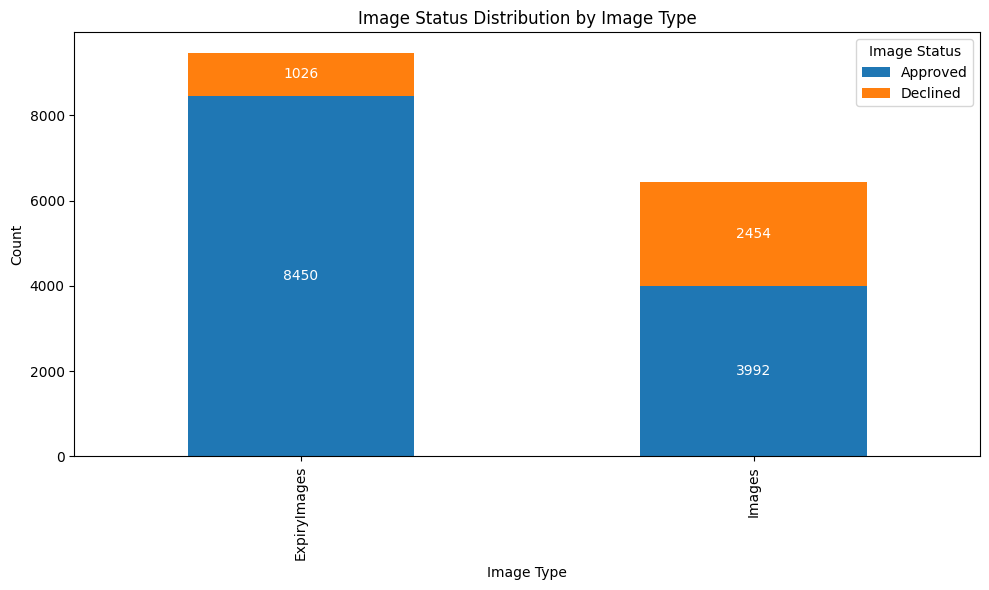

In [7]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load the CSV file
# file_path = 'data/newimage.csv'  # 로컬 파일 경로로 변경
# data = pd.read_csv(file_path)

# # Group by 'image_type' and calculate the distribution of 'image_status'
# image_type_distributions = data.groupby('image_type')['image_status'].value_counts(normalize=True).unstack()

# # Display the distribution as a table
# print("Image Type Distributions:")
# print(image_type_distributions)

# # Visualize the distribution with a bar plot
# image_type_distributions.plot(kind='bar', stacked=True, figsize=(10, 6))
# plt.title("Image Status Distribution by Image Type")
# plt.ylabel("Proportion")
# plt.xlabel("Image Type")
# plt.legend(title="Image Status")
# plt.tight_layout()
# plt.show()



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'data/newimage.csv'  # 로컬 파일 경로로 변경
data = pd.read_csv(file_path)

# Group by 'image_type' and calculate the distribution of 'image_status'
image_type_distributions = data.groupby('image_type')['image_status'].value_counts(normalize=True).unstack()
image_type_counts = data.groupby('image_type')['image_status'].value_counts().unstack()

# Display the distribution as a table
print("Image Type Distributions:")
print(image_type_distributions)

# Prepare bar chart
fig, ax = plt.subplots(figsize=(10, 6))
image_type_counts.plot(kind='bar', stacked=True, ax=ax)

# Add title and labels
plt.title("Image Status Distribution by Image Type")
plt.ylabel("Count")
plt.xlabel("Image Type")
plt.legend(title="Image Status")
plt.tight_layout()

# Add text labels on bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{int(height)}',  # Convert height to integer
                ha='center',
                va='center',
                fontsize=10,
                color='white'  # Ensure text is visible on the bar
            )

# Show the plot
plt.show()



Balanced Image Type Distributions:
image_status  Approved  Declined
image_type                      
ExpiryImages  0.528493  0.471507
Images        0.617519  0.382481
Image Type Distributions:
image_status  Approved  Declined
image_type                      
ExpiryImages  0.528493  0.471507
Images        0.617519  0.382481


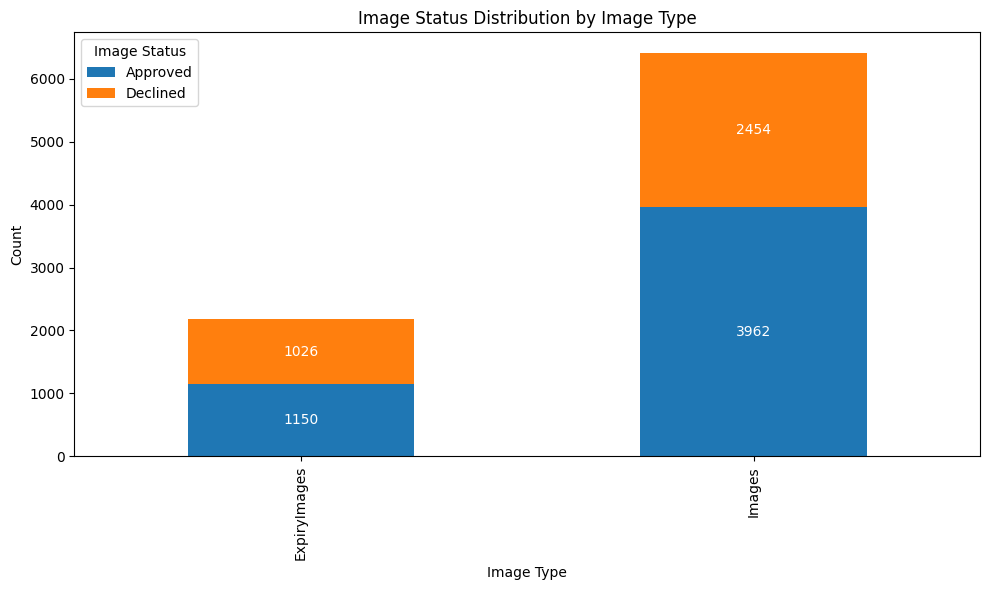

In [10]:
import pandas as pd

def stratified_undersample(data, image_type_col, status_col, random_state=42):
    """
    Performs stratified undersampling for Approved data based on Declined ratio per image_type.

    Parameters:
        data (pd.DataFrame): The input dataset.
        image_type_col (str): The column name for image type (e.g., 'image_type').
        status_col (str): The column name for status (e.g., 'image_status').
        random_state (int): Random state for reproducibility.

    Returns:
        pd.DataFrame: Stratified undersampled dataset.
    """
    balanced_data = []
    
    for image_type, group in data.groupby(image_type_col):
        approved = group[group[status_col] == 'Approved']
        declined = group[group[status_col] == 'Declined']
        
        # Calculate target size for Approved based on Declined size and existing ratio
        declined_count = len(declined)
        target_approved_count = int(declined_count / (1 - declined_count / len(group)))

        # Undersample Approved if necessary
        if len(approved) > target_approved_count:
            undersampled_approved = approved.sample(n=target_approved_count, random_state=random_state)
        else:
            undersampled_approved = approved
        
        # Combine undersampled Approved and Declined
        balanced_group = pd.concat([undersampled_approved, declined])
        balanced_data.append(balanced_group)
    
    return pd.concat(balanced_data)

# Perform stratified undersampling
balanced_data = stratified_undersample(data, 'image_type', 'image_status')

# Check the new distribution
balanced_distributions = balanced_data.groupby('image_type')['image_status'].value_counts(normalize=True).unstack()

# Save the balanced data and display the new distribution
balanced_data.to_csv('data/newimage_undersampled.csv', index=False)

# Display the distribution in the terminal
print("Balanced Image Type Distributions:")
print(balanced_distributions)

# Optional: Visualize the distribution with a bar plot
import matplotlib.pyplot as plt
import seaborn as sns

data = balanced_data

image_type_distributions = data.groupby('image_type')['image_status'].value_counts(normalize=True).unstack()
image_type_counts = data.groupby('image_type')['image_status'].value_counts().unstack()

# Display the distribution as a table
print("Image Type Distributions:")
print(image_type_distributions)

# Prepare bar chart
fig, ax = plt.subplots(figsize=(10, 6))
image_type_counts.plot(kind='bar', stacked=True, ax=ax)

# Add title and labels
plt.title("Image Status Distribution by Image Type")
plt.ylabel("Count")
plt.xlabel("Image Type")
plt.legend(title="Image Status")
plt.tight_layout()

# Add text labels on bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{int(height)}',  # Convert height to integer
                ha='center',
                va='center',
                fontsize=10,
                color='white'  # Ensure text is visible on the bar
            )

# Show the plot
plt.show()